In [1]:
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools

%matplotlib inline

In [2]:
tf.keras.utils.set_random_seed(42)

In [3]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape, y_train_labels.shape, y_test_labels.shape, sep='\n')

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label is 1


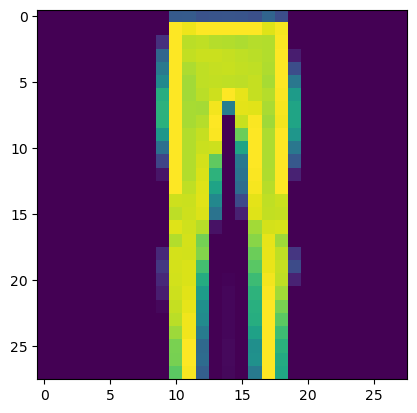

In [5]:
plt.imshow(X_train[4345])
print(f'Label is {y_train_labels[4345]}')

In [6]:
# нормализация
X_train = X_train / 255
X_test = X_test / 255

In [7]:
for i in [X_train, X_test]:
    print(i.min(), i.max())

0.0 1.0
0.0 1.0


In [8]:
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
set(y_train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [11]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential([
        Dense(98, input_shape=(28 * 28,), activation='selu'),
        Dense(50, activation='selu'),
        Dense(10, activation='sigmoid')
    ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 98)                76930     
                                                                 
 dense_1 (Dense)             (None, 50)                4950      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 82,390
Trainable params: 82,390
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy', 'Recall'])

In [15]:
var1 = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/10
235/235 [==============================] - 5s 15ms/step - loss: 0.9637 - accuracy: 0.6819 - recall: 0.9789 - val_loss: 0.7173 - val_accuracy: 0.7570 - val_recall: 0.9936
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6376 - accuracy: 0.7871 - recall: 0.9947 - val_loss: 0.6140 - val_accuracy: 0.7931 - val_recall: 0.9954
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.5651 - accuracy: 0.8082 - recall: 0.9959 - val_loss: 0.5716 - val_accuracy: 0.8008 - val_recall: 0.9958
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.5272 - accuracy: 0.8193 - recall: 0.9966 - val_loss: 0.5437 - val_accuracy: 0.8102 - val_recall: 0.9962
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.5033 - accuracy: 0.8268 - recall: 0.9969 - val_loss: 0.5261 - val_accuracy: 0.8173 - val_recall: 0.9967
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.4862 - accuracy: 0.8309

In [16]:
var1.history['accuracy'][-1]

0.8442166447639465

In [17]:
var1.history['val_accuracy'][-1]

0.8338000178337097

In [18]:
var1.history['recall'][-1]

0.9977333545684814

In [19]:
var1_pred = model.predict(X_test[:5, :])

1/1 [==============================] - 0s 444ms/step


In [20]:
var1_pred

array([[5.3018034e-02, 3.8298942e-02, 1.1011117e-01, 3.8147364e-02,
        1.1911156e-01, 9.9376589e-01, 1.1410966e-01, 9.9411815e-01,
        8.8392323e-01, 9.9711937e-01],
       [5.5842203e-01, 6.5433778e-02, 9.9916488e-01, 2.6881546e-01,
        9.8573995e-01, 2.9588647e-02, 9.9666387e-01, 3.5877284e-04,
        5.3758281e-01, 5.7409876e-03],
       [9.7906685e-01, 9.9999237e-01, 6.3636917e-01, 8.6001712e-01,
        9.2707896e-01, 6.1655972e-02, 5.5740360e-02, 4.6890742e-01,
        4.0724581e-01, 3.4670990e-02],
       [7.7676392e-01, 9.9998850e-01, 4.8758236e-01, 9.6750146e-01,
        8.9995843e-01, 1.2822177e-01, 6.2980287e-02, 3.9609614e-01,
        1.7391531e-01, 3.9338446e-01],
       [9.6303260e-01, 2.8079697e-01, 9.4239843e-01, 7.1448433e-01,
        6.7302656e-01, 7.0125856e-02, 9.8586196e-01, 4.5887339e-03,
        2.5806692e-01, 6.0670931e-02]], dtype=float32)

In [21]:
var1_pred_classes = np.argmax(var1_pred, axis=1)
var1_pred_classes

array([9, 2, 1, 1, 6], dtype=int64)

In [22]:
y_test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [24]:
model.evaluate(X_train, y_train, batch_size=256)

235/235 [==============================] - 1s 5ms/step - loss: 0.4450 - accuracy: 0.8440 - recall: 0.9979


[0.44498762488365173, 0.8439666628837585, 0.9978500008583069]

In [23]:
model.evaluate(X_test, y_test, batch_size=256)

40/40 [==============================] - 0s 6ms/step - loss: 0.4802 - accuracy: 0.8338 - recall: 0.9978


[0.4801642596721649, 0.8338000178337097, 0.9977999925613403]

# Зависимость результата от количества нейронов в слое (при двухслойном исполнении)

In [74]:
result_dict = {
    'n_neurons': [],
    'n_layers': [],
    'train_loss': [],
    'train_accuracy': [],
    'test_loss': [],
    'test_accuracy': []
}

In [75]:
def train_model_n_neur(n_neur):
    result_dict['n_neurons'].append(n_neur)
    result_dict['n_layers'].append(2)
    model = Sequential([
        Dense(98, input_shape=(784,), activation='selu'),
        Dense(n_neur, activation='selu'),
        Dense(10, activation='sigmoid')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    variant = model.fit(X_train, y_train,
                    epochs=10,   
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=256)
    result_dict['train_loss'].append(train_loss)
    result_dict['train_accuracy'].append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=256)
    result_dict['test_loss'].append(test_loss)
    result_dict['test_accuracy'].append(test_metric)

In [76]:
for i in [2**x for x in range(10)]:
    train_model_n_neur(i)

40/40 [==============================] - 0s 6ms/step - loss: 0.4743 - accuracy: 0.8316


In [77]:
result_dataframe = pd.DataFrame(result_dict)

In [78]:
result_dataframe

,n_neurons,n_layers,train_loss,train_accuracy,test_loss,test_accuracy
0,1,2,1.560816,0.343333,1.565705,0.3418
1,2,2,1.226547,0.512667,1.242139,0.5116
2,4,2,0.581515,0.795200,0.599688,0.7886
3,8,2,0.480135,0.833550,0.509591,0.8239
4,16,2,0.461178,0.836650,0.491480,0.8245
5,32,2,0.453445,0.839700,0.487880,0.8264
6,64,2,0.440845,0.844833,0.475377,0.8315
7,128,2,0.441502,0.845117,0.475360,0.8299
8,256,2,0.446353,0.841883,0.478000,0.8293
9,512,2,0.441511,0.844967,0.474327,0.8316


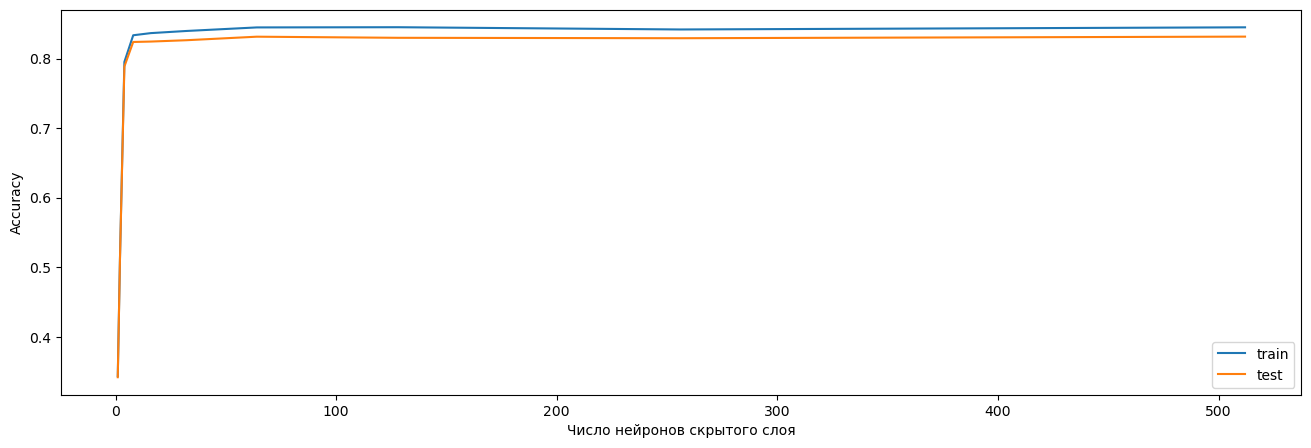

In [79]:
plt.figure(figsize=(16, 5))
plt.plot(result_dict['n_neurons'], result_dict['train_accuracy'], label='train')
plt.plot(result_dict['n_neurons'], result_dict['test_accuracy'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
result_dataframe.sort_values('test_accuracy', ascending=False)

,n_neurons,n_layers,train_loss,train_accuracy,test_loss,test_accuracy
9,512,2,0.441511,0.844967,0.474327,0.8316
6,64,2,0.440845,0.844833,0.475377,0.8315
7,128,2,0.441502,0.845117,0.475360,0.8299
8,256,2,0.446353,0.841883,0.478000,0.8293
5,32,2,0.453445,0.839700,0.487880,0.8264
4,16,2,0.461178,0.836650,0.491480,0.8245
3,8,2,0.480135,0.833550,0.509591,0.8239
2,4,2,0.581515,0.795200,0.599688,0.7886
1,2,2,1.226547,0.512667,1.242139,0.5116
0,1,2,1.560816,0.343333,1.565705,0.3418


Видимо оптимально что-то около 64 нейронов на скрытом слое. Не вижу большого смысла гонять в разы больше параметров при улучшении результата в тесте на одну десятитысячную. 

# Зависимость от количестива скрытых слоев

In [86]:
def train_model_n_layers(n_layers):
    layers_neurons_dict = {2:512, 3:162, 5:101, 10:64}
    n_neur = layers_neurons_dict[n_layers]
    result_dict['n_neurons'].append(n_neur)
    result_dict['n_layers'].append(n_layers)
    model = Sequential()
    model.add(Dense(98, input_shape=(784,), activation='selu'))
    for i in range(n_layers - 1):
        model.add(Dense(n_neur, activation='selu'))
    model.add(Dense(10, activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    variant = model.fit(X_train, y_train,
                    epochs=10,  
                    batch_size=256,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=256)
    result_dict['train_loss'].append(train_loss)
    result_dict['train_accuracy'].append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=256)
    result_dict['test_loss'].append(test_loss)
    result_dict['test_accuracy'].append(test_metric)

In [87]:
for i in [2, 3, 5, 10]:
    train_model_n_layers(i)

40/40 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8480


In [88]:
result_dataframe = pd.DataFrame(result_dict)


In [92]:
result_dataframe.tail(4)

,n_neurons,n_layers,train_loss,train_accuracy,test_loss,test_accuracy
10,512,2,0.443541,0.844250,0.476262,0.8311
11,162,3,0.421153,0.849550,0.459716,0.8380
12,101,5,0.396493,0.856917,0.440970,0.8406
13,64,10,0.357161,0.869450,0.415069,0.8480


In [91]:
different_n_layers = result_dataframe.tail(4)

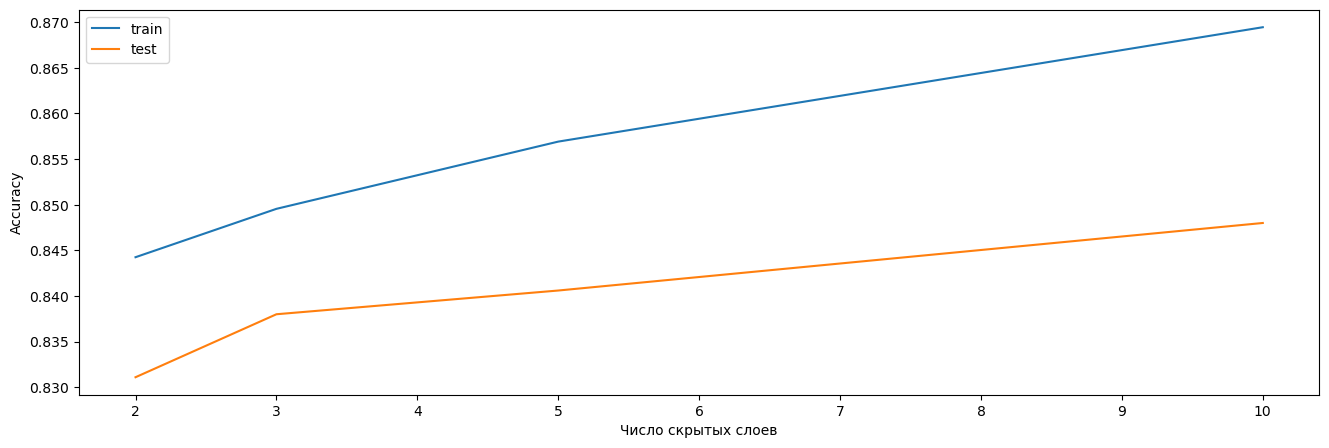

In [93]:
plt.figure(figsize=(16, 5))
plt.plot(different_n_layers['n_layers'], different_n_layers['train_accuracy'], label='train')
plt.plot(different_n_layers['n_layers'], different_n_layers['test_accuracy'], label='test')
plt.xlabel('Число скрытых слоев')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Проба разных оптимизаторов

In [105]:
different_optimizers_result_dict = {
    'optimizer': [],
    'train_loss': [],
    'train_accuracy': [],
    'test_loss': [],
    'test_accuracy': []    
}

In [106]:
optimizers_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

In [107]:
model = Sequential([
        Dense(98, input_shape=(784,), activation='selu'),
        Dense(64, activation='selu'),
        Dense(10, activation='sigmoid')
    ])

In [108]:
model.save_weights('model_weights.h5')

In [109]:
for optimizer in optimizers_list:
    different_optimizers_result_dict['optimizer'].append(optimizer)
    model = Sequential([
        Dense(98, input_shape=(784,), activation='selu'),
        Dense(64, activation='selu'),
        Dense(10, activation='sigmoid')
    ])
    model.load_weights('model_weights.h5')
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    variant = model.fit(X_train, y_train,
                epochs=10,  
                batch_size=256,
                verbose=0,
                validation_data=(X_test, y_test)
                )
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=256)
    different_optimizers_result_dict['train_loss'].append(train_loss)
    different_optimizers_result_dict['train_accuracy'].append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=256)
    different_optimizers_result_dict['test_loss'].append(test_loss)
    different_optimizers_result_dict['test_accuracy'].append(test_metric)
    

40/40 [==============================] - 0s 5ms/step - loss: 2.3026 - accuracy: 0.1000


In [112]:
different_optimizers_result_df = pd.DataFrame(different_optimizers_result_dict)

In [116]:
different_optimizers_result_df.sort_values('test_accuracy', ascending=False)

,optimizer,train_loss,train_accuracy,test_loss,test_accuracy
2,Adam,0.264361,0.903750,0.342344,0.8772
6,Nadam,0.290486,0.891350,0.371544,0.8655
5,Adamax,0.323624,0.884767,0.381149,0.8641
1,RMSprop,0.307876,0.883867,0.381578,0.8594
0,SGD,0.443291,0.843700,0.477039,0.8330
4,Adagrad,0.551882,0.814100,0.576113,0.8046
3,Adadelta,1.306314,0.614733,1.313165,0.6096
7,Ftrl,2.302551,0.100000,2.302550,0.1000


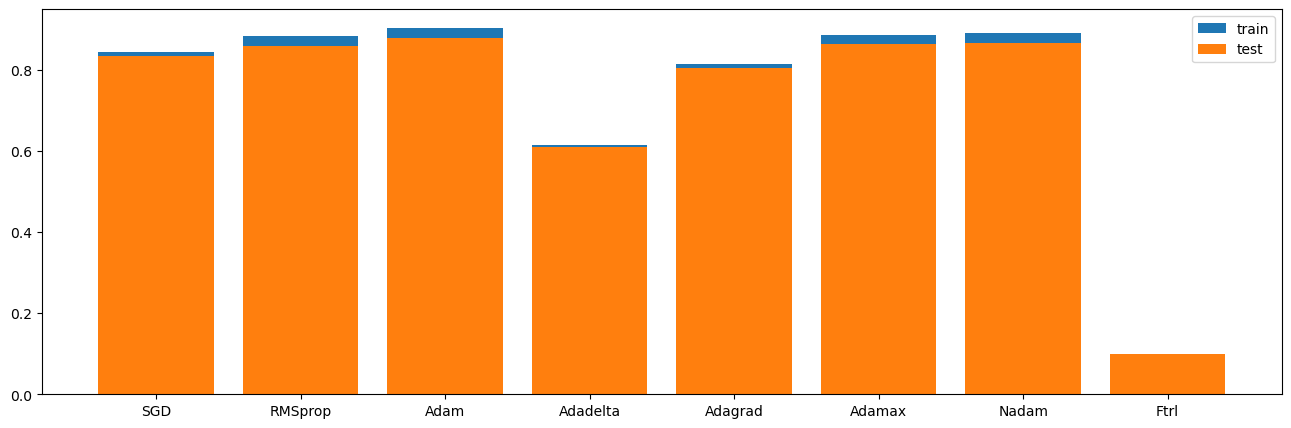

In [121]:
plt.figure(figsize=(16, 5))
plt.bar(different_optimizers_result_df['optimizer'], different_optimizers_result_df['train_accuracy'], label='train')
plt.bar(different_optimizers_result_df['optimizer'], different_optimizers_result_df['test_accuracy'], label='test')
plt.legend()
plt.show()

Оптимизатор Adam показывает лучшие результаты

In [122]:
final_model = Sequential([
        Dense(98, input_shape=(784,), activation='selu'),
        Dense(64, activation='selu'),
        Dense(10, activation='sigmoid')
    ])

final_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
variant = final_model.fit(X_train, y_train,
            epochs=10,  
            batch_size=256,
            verbose=0,
            validation_data=(X_test, y_test)
            )

In [124]:
final_model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 46ms/step


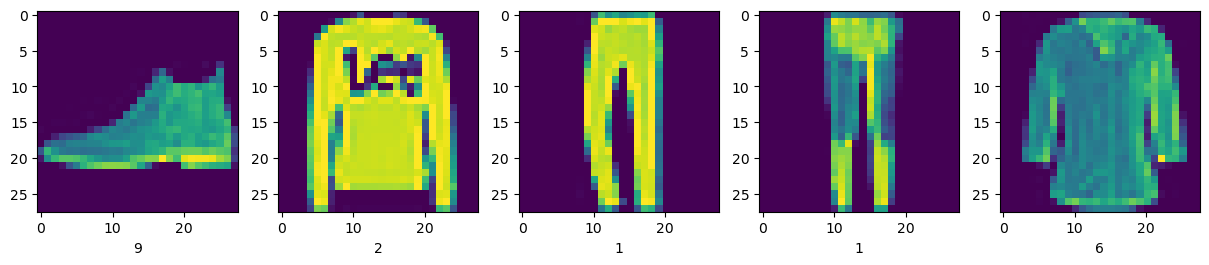

In [128]:
N = 5
y_pred = final_model.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  #plt.xlabel(str(y_pred_class[i]))
  plt.xlabel(str(y_test_labels[i]))
plt.show() 

In [129]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [131]:
y_pred = final_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [134]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


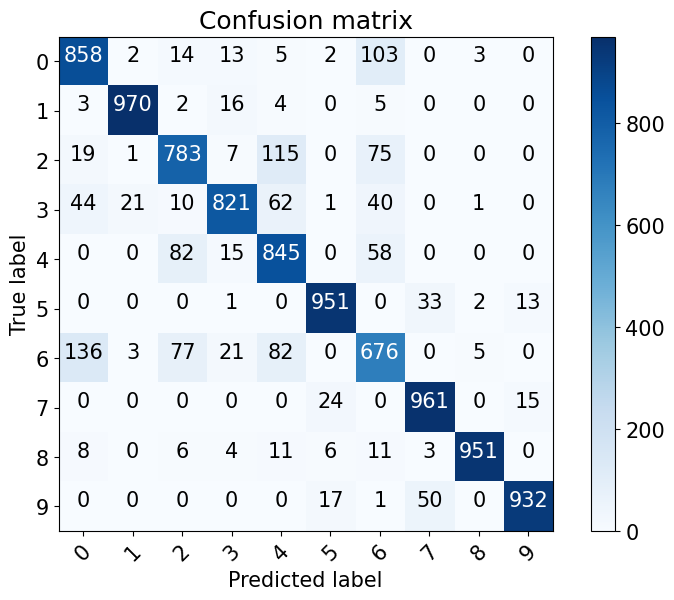

In [136]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [137]:
ind = []
for i in range(10):
    ind.append(np.where(y_test_labels == i)[0][0])

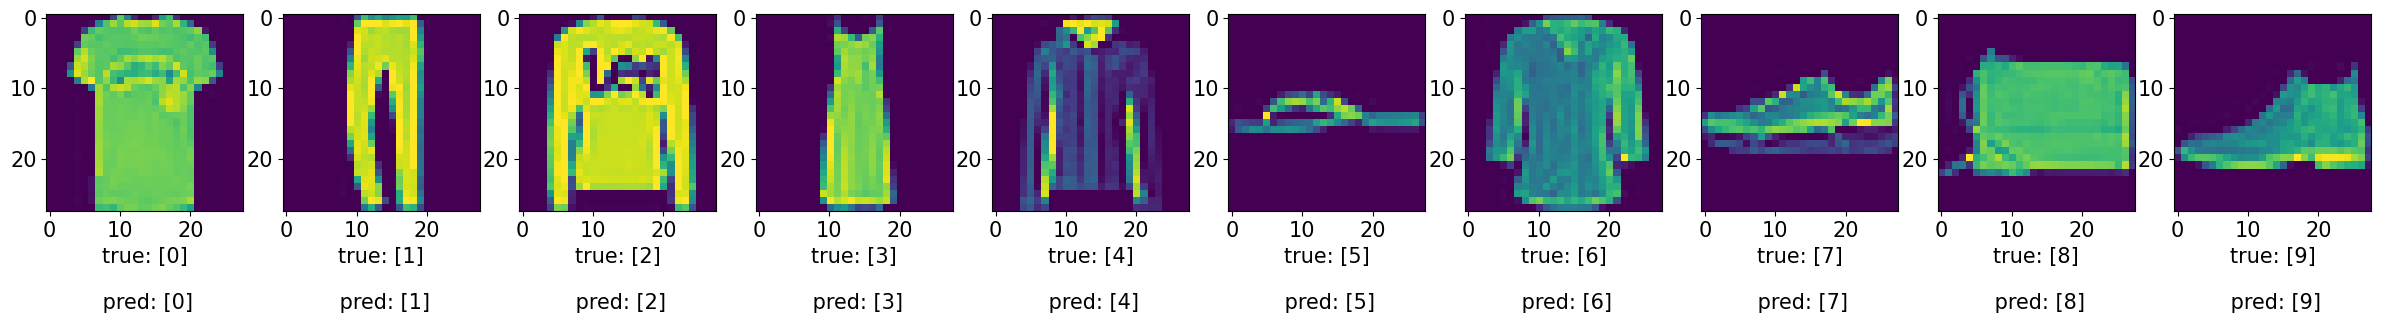

In [140]:
plt.figure(figsize=(3 * 10, 5))
k = 0
for i in ind:
    plt.subplot(1, 10, k+1)
    k+=1
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel('true: ' + str([y_test_labels[i]]) + '\n \n pred: ' + str([y_pred_class[i]]))

plt.show() 

Модель чаще всего путает 0, 2, 3 и 4 классы с 6